## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [1]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.models import Sequential
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'keras'

In [33]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = './chest_xray/train'
valid_path = './chest_xray/test'


In [34]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


count=0

In [35]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False
    count+=1
print("Number of total layers: ",count)

Number of total layers:  19


In [36]:
  # useful for getting number of output classes
count=0
folders = glob('./chest_xray/train/*')

In [37]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [38]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [39]:

# view the structure of the model
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [40]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [41]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [42]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('./chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [43]:
test_set = test_datagen.flow_from_directory('./chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [44]:

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
163/163 [==============================] - 1178s 7s/step - loss: 0.1904 - accuracy: 0.9264 - val_loss: 0.3467 - val_accuracy: 0.8990
Epoch 2/5
163/163 [==============================] - 1132s 7s/step - loss: 0.1249 - accuracy: 0.9523 - val_loss: 0.2706 - val_accuracy: 0.9183
Epoch 3/5
163/163 [==============================] - 1330s 8s/step - loss: 0.1008 - accuracy: 0.9641 - val_loss: 0.2918 - val_accuracy: 0.9119
Epoch 4/5
163/163 [==============================] - 1299s 8s/step - loss: 0.0777 - accuracy: 0.9722 - val_loss: 0.2174 - val_accuracy: 0.9167
Epoch 5/5
163/163 [==============================] - 1205s 7s/step - loss: 0.1012 - accuracy: 0.9618 - val_loss: 0.4304 - val_accuracy: 0.8846


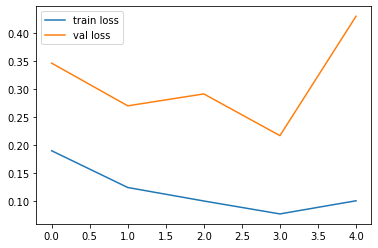

KeyError: 'acc'

<Figure size 432x288 with 0 Axes>

In [46]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [47]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')

In [49]:
# Similary you can use the same template for Vgg 19, Resnet50, Mobilenet. All you have to import the library. Below are the examples

from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3





In [58]:
from keras.models import load_model
from keras.preprocessing import image
#import keras.utils as image
#from tensorflow.keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = load_model('model_vgg16.h5')
img = image.load_img('./chest_xray/test/PNEUMONIA/person1_virus_6.jpeg',target_size=(244,244))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

AttributeError: module 'keras.preprocessing.image' has no attribute 'load_img'

Note: you may need to restart the kernel to use updated packages.


In [53]:
pip install model_vgg19.h5

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement model_vgg19.h5 (from versions: none)
ERROR: No matching distribution found for model_vgg19.h5
You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.
